In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

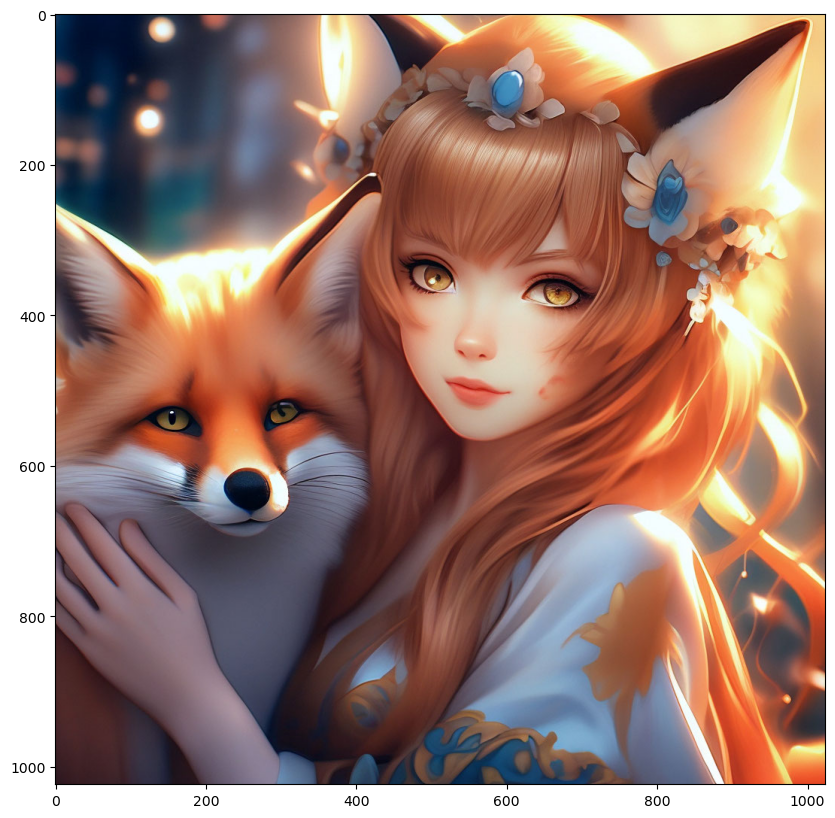

In [2]:

img = cv2.imread('desktop/3daa.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

[245 215 119]


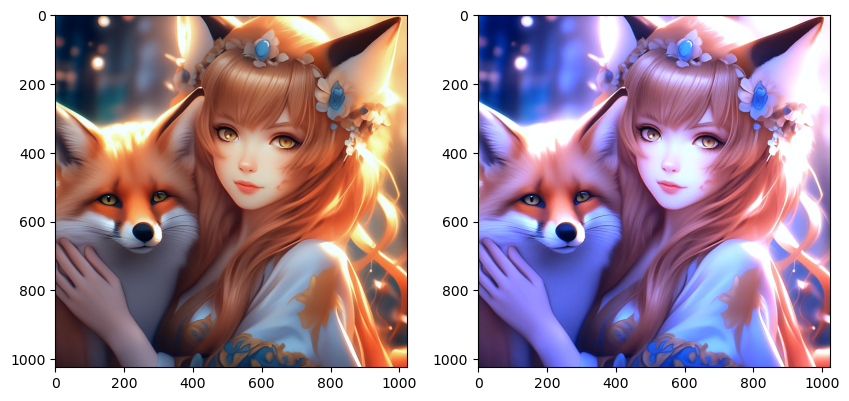

In [3]:
#WHITE PATH

row, col = 295, 964 
white = img[row, col, :]
coeffs = 255.0/white
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]
balanced = balanced/255
balanced[balanced > 1] = 1
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)
print(white)

kr 0.6762148208830254
kg 0.6567269228769405
kb 1.0


(<Axes: >, <matplotlib.image.AxesImage at 0x20b907159d0>)

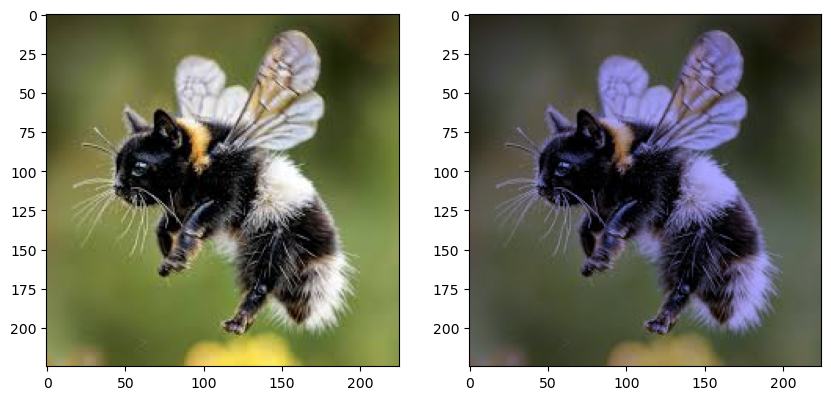

In [4]:
#GRAY WORLD
img = cv2.imread('desktop/images.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the mean values for all three colour channels (red, green, blue)
mean_r = np.mean(img[:, :, 0])  # Середнє значення червоного каналу
mean_g = np.mean(img[:, :, 1])  # Середнє значення зеленого каналу
mean_b = np.mean(img[:, :, 2])  # Середнє значення синього каналу

common_mean = (mean_r + mean_g + mean_b)/3
common_mean = mean_b

# Compute the coefficients kr, kg, kb
kr = common_mean/mean_r
print('kr', kr)
kg = common_mean/mean_g
print('kg', kg)
kb = common_mean/mean_b
print('kb', kb)
     
coeffs = [kr, kg, kb]
# Apply color balancing and generate the balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]
balanced = balanced/255
balanced[balanced > 1] = 1

# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

255
255
255


(<Axes: >, <matplotlib.image.AxesImage at 0x20b8fb211d0>)

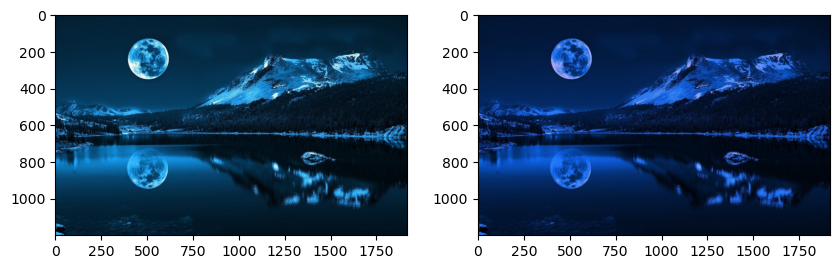

In [5]:
#SCALE-BY-MAX

img = cv2.imread('desktop/moon.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the maximum values for all three colour channels (red, green, blue)
max_r = np.max(img)
print(max_r)

max_g = np.max(img)
print(max_g)

max_b = np.max(img)
print(max_b)
# Apply scale-by-max balancing and generate the balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)